# Figure 8 and Figure 9: Ratio between the cost of the equilibrium and of the global optimum for different values of initial states

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_toolkits.mplot3d import Axes3D
from mfg_computation import Parameters, mf_equilibrium, mf_optimum, get_equilibrium_n_players, get_globaloptimum_n_players

In [23]:
def compute_N_poa(N):
    eq_cost = []; gopt_cost = []
    for s0 in range(1,N):
        eq_cost_v = []; gopt_cost_v = []
        for i0 in range(1,N):
            #print('computing for (s,i)=',s0,i0,end='...')
            if N-s0-i0>0: 
                I0=i0/N; S0=s0/N
                bestpol, Js, Ji = get_equilibrium_n_players(N)
                val_eq_cost = Js[0,int(S0*N),int(I0*N)]*S0+Ji[0,int(S0*N),int(I0*N)]*I0
                #print('eq done',end='...')
                bestpol, J = get_globaloptimum_n_players(N)
                val_opt_cost = J[int(S0*N),int(I0*N),0]
                #print('globalopt done')
            else:
                val_eq_cost = 0
                val_opt_cost = -1
            eq_cost_v.append(val_eq_cost)
            gopt_cost_v.append(val_opt_cost)
        eq_cost.append(eq_cost_v); 
        gopt_cost.append(gopt_cost_v)
    
    mat_eq_cost=np.array([np.array(xi) for xi in eq_cost])
    mat_opt_cost=np.array([np.array(xi) for xi in gopt_cost])
    poa_cost = mat_eq_cost / mat_opt_cost
    
    np.save('data/poa_cost_N{}.npy'.format(N),poa_cost)
    

def get_N_poa(N): 
    poa_cost = np.load('data/poa_cost_N{}.npy'.format(N))
    return poa_cost

def compute_mf_poa(N, C = 100000):
    PARAMS = Parameters() # default parameters from paper
    mfe_cost = []; mfopt_cost = []
    for s0 in range(1,N):
        mfe_cost_v = []; mfopt_cost_v = []
        for i0 in range(1,N):
            #print('computing for (s,i)=',s0,i0,end='...')
            if N-s0-i0>0: 
                I0=i0/N; S0=s0/N
                val_mfe_cost, t_mfe = mf_equilibrium(PARAMS, S0, I0, C)
                #print('eq done',end='...')
                val_mfopt_cost, t_mfopt = mf_optimum(PARAMS, S0, I0, C)
                #print('globalopt done')
            else:
                val_mfe_cost = 0
                val_mfopt_cost = -1
            mfe_cost_v.append(val_mfe_cost)
            mfopt_cost_v.append(val_mfopt_cost)
        mfe_cost.append(mfe_cost_v); 
        mfopt_cost.append(mfopt_cost_v)
    
    mat_mfe_cost=np.array([np.array(xi) for xi in mfe_cost])
    mat_mfopt_cost=np.array([np.array(xi) for xi in mfopt_cost])
    
    np.save('data/poa_cost_mf.npy',mat_mfe_cost/mat_mfopt_cost)
    #return mat_mfe_cost, mat_mfopt_cost
    
def get_mf_poa(N):
    mat_poa_cost = np.load('data/poa_cost_mf.npy'.format(N))
    return mat_poa_cost
    #mf_equ = np.load('data/equi_mf.npy')
    #mf_opt = np.load('data/globalopt_mf.npy')
    #return replace_zeros_by_nan(mf_equ)/replace_zeros_by_nan(mf_opt)

def replace_zeros_by_nan(array):
    new_array = np.ones((len(array)+1,len(array)+1))
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i,j] == 0: 
                new_array[1+i,1+j] = np.nan
            else:
                #print(array[i,j])
                new_array[1+i,1+j] = array[i,j]
    return new_array 

def mf_equ_opt(N):
    mf_equ = np.load('data/equi_mf.npy'.format(N))
    mf_opt = np.load('data/globalopt_mf.npy'.format(N))
    return replace_zeros_by_nan(mf_equ), replace_zeros_by_nan(mf_opt)

def mf_poa(N):
    mf_equ,mf_opt = mf_equ_opt(N)
    return replace_zeros_by_nan(mf_equ)/replace_zeros_by_nan(mf_opt)

def N_equ_opt(N):
    N_equ, Js, Ji = np.load('data/equi_N{}.npy'.format(N))
    N_opt, J = np.load('data/globalopt_N{}.npy'.format(N))
    return replace_zeros_by_nan(N_equ), replace_zeros_by_nan(N_opt)

def N_poa(N):
    N_equ,N_opt = N_equ_opt(N)
    return N_equ/N_opt


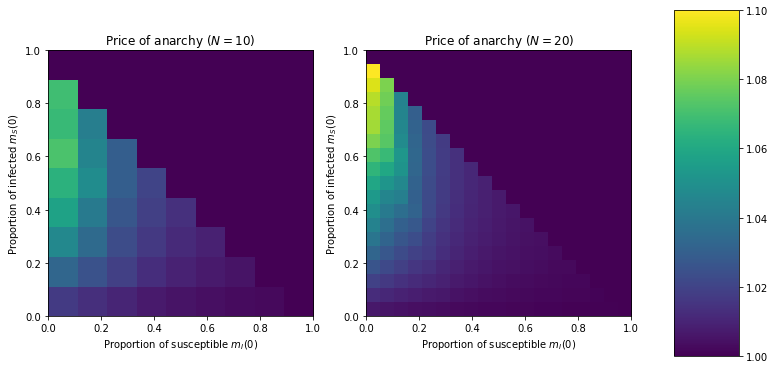

In [58]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((12,6))

for i,N in enumerate([10,20]):
    #compute_N_poa(N)
    data = get_N_poa(N)
    ax = plt.subplot(1,2,i+1)
    img = plt.imshow(data, origin='lower', vmin=1, vmax=1.10, extent=[0,1,0,1])
    plt.xlabel(r'Proportion of susceptible $m_I(0)$')
    plt.ylabel(r'Proportion of infected $m_S(0)$')
    plt.title(r'Price of anarchy ($N={}$)'.format(N))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
#fig.savefig('price_of_anarchy_Nfinite.pdf',bbox_inches='tight')

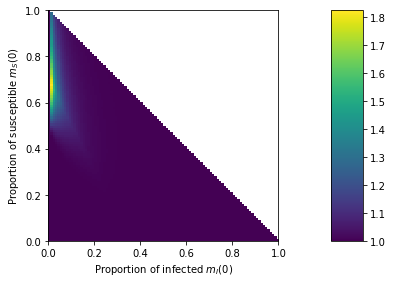

In [59]:
fig, axs = plt.subplots(1, 1)
N=100
#compute_mf_poa(N)
data=get_mf_poa(N)
ax = plt.subplot(1,1,1)
for i in range(N):
    for j in range(N-i):
        if np.isnan(data[i,j]): 
            data[i,j] = 0
            
img = plt.imshow(data, origin='lower', vmin=1, extent=[0,1,0,1])

plt.xlabel(r'Proportion of infected $m_I(0)$')
plt.ylabel(r'Proportion of susceptible $m_S(0)$')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

#fig.savefig('price_of_anarchy_infinite.pdf',bbox_inches='tight')